In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

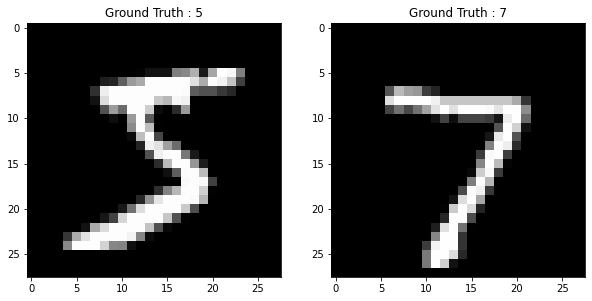

In [40]:
from keras.utils import to_categorical
import numpy as np
from matplotlib import pyplot as plt

print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [0]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [0]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [43]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.2703 - accuracy: 0.9159 - val_loss: 0.1274 - val_accuracy: 0.9593
Epoch 2/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0926 - accuracy: 0.9715 - val_loss: 0.0871 - val_accuracy: 0.9736
Epoch 3/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0589 - accuracy: 0.9814 - val_loss: 0.0832 - val_accuracy: 0.9739
Epoch 4/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0645 - val_accuracy: 0.9814
Epoch 5/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0305 - accuracy: 0.9902 - val_loss: 0.0768 - val_accuracy: 0.9775
Epoch 6/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0767 - val_accuracy: 0.9805
Epoch 7/20
60000/60000 [==============================] - 1s 14us/st

In [47]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data when using Sequential : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 0s 49us/step
Evaluation result on Test Data when using Sequential : Loss = 0.13779719277742014, accuracy = 0.9797000288963318


In [48]:
# Predict the most likely class
model.predict_classes(test_data[[0],:])

array([7])

In [49]:
#Using the model API
from keras.models import Model
from keras.layers import Input

ip_layer=Input(shape=(784,))
hl1=Dense(512,activation='relu')(ip_layer)
hl2=Dense(512,activation='relu')(hl1)
output=Dense(10,activation='softmax')(hl2)
model_api=Model(inputs=ip_layer,outputs=output)
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_33 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_34 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model_api.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
history = model_api.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.2688 - accuracy: 0.9170 - val_loss: 0.1108 - val_accuracy: 0.9654
Epoch 2/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0937 - accuracy: 0.9712 - val_loss: 0.1268 - val_accuracy: 0.9595
Epoch 3/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0589 - accuracy: 0.9819 - val_loss: 0.0667 - val_accuracy: 0.9793
Epoch 4/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0695 - val_accuracy: 0.9804
Epoch 5/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0282 - accuracy: 0.9910 - val_loss: 0.0805 - val_accuracy: 0.9794
Epoch 6/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0772 - val_accuracy: 0.9793
Epoch 7/20
60000/60000 [==============================] - 1s 15us/st

In [52]:
[test_loss, test_acc] = model_api.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data when using Model API : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 50us/step
Evaluation result on Test Data when using Model API : Loss = 0.15202330370922895, accuracy = 0.9821000099182129


In [53]:
# Predict the most likely class
model.predict_classes(test_data[[0],:])

array([7])